Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # Added LabelEncoder for target
from sklearn.neighbors import KNeighborsClassifier # The KNN model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For decision boundary visualization
from matplotlib.colors import ListedColormap

# Configure settings
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported.")

Libraries imported.


Load and Inspect Data

In [11]:
# Load the dataset
file_path = 'Iris.csv' 
df = pd.read_csv(file_path)

# Basic Inspection
print("Dataset Information:")
df.info() 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
print("\nFirst 5 Rows:")
display(df.head())


First 5 Rows:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100,3.500,1.400,0.200,Iris-setosa
1,2,4.900,3.000,1.400,0.200,Iris-setosa
2,3,4.700,3.200,1.300,0.200,Iris-setosa
3,4,4.600,3.100,1.500,0.200,Iris-setosa
4,5,5.000,3.600,1.400,0.200,Iris-setosa


In [13]:
# --- Data Cleaning / Initial Processing ---
# Drop the 'Id' column as it's just an index
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
    print("Dropped 'Id' column.")

Dropped 'Id' column.


In [17]:
print("Target Variable Distribution (Species):")
print(df['Species'].value_counts())

Target Variable Distribution (Species):
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [16]:
print("nummary Statistics:")
display(df.describe()) # Check scales of numerical features

nummary Statistics:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [19]:
print("Checking for Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}") 

Checking for Missing Values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Total missing values: 0


 Preprocessing - Encoding Target & Feature/Target Split

In [20]:
# --- Preprocessing ---

# 1. Encode the Categorical Target Variable ('Species')
# KNN requires numerical target labels.
label_encoder = LabelEncoder()
df['Species_Encoded'] = label_encoder.fit_transform(df['Species'])

In [22]:
species_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Species to Encoded Label Mapping:")
print(species_mapping)

Species to Encoded Label Mapping:
{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [24]:
print("DataFrame with Encoded Target:")
display(df[['Species', 'Species_Encoded']].head())

DataFrame with Encoded Target:


,Species,Species_Encoded
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0


In [25]:
# 2. Separate Features (X) and Target (y)
# Features are the numerical measurement columns
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_columns]
y = df['Species_Encoded'] 

In [27]:
print("--- Feature and Target Separation ---")
print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)
print("Feature names:", X.columns.tolist())

--- Feature and Target Separation ---
Shape of Features (X): (150, 4)
Shape of Target (y): (150,)
Feature names: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


Train/Test Split

In [28]:
# Split data into training (70%) and testing (30%) sets
# Stratify ensures similar class proportions in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("--- Data Split Shapes ---")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

--- Data Split Shapes ---
X_train: (105, 4)
X_test: (45, 4)
y_train: (105,)
y_test: (45,)


 Normalize/Standardize Features

In [29]:
# KNN relies on distance metrics, so features need to be on a similar scale.
# Standardization (mean=0, stddev=1) is a common choice.

scaler = StandardScaler()

# Fit scaler ONLY on training data
scaler.fit(X_train)

# Transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for viewing 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [31]:
print("--- Feature Scaling (Standardization) ---")
print("Scaled Training Data Head:")
display(X_train_scaled_df.head())

--- Feature Scaling (Standardization) ---
Scaled Training Data Head:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900,-1.218,-0.443,-0.135
1,0.380,-1.882,0.403,0.381
2,-0.900,1.659,-1.288,-1.167
3,1.079,0.331,1.192,1.413
4,-0.202,-0.554,0.177,0.123


In [32]:
print("\nScaled Training Data Description (Mean ~0, Stddev ~1):")
display(X_train_scaled_df.describe())


Scaled Training Data Description (Mean ~0, Stddev ~1):


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.000,105.000,105.000,105.000
mean,0.000,-0.000,-0.000,0.000
std,1.005,1.005,1.005,1.005
min,-1.832,-2.325,-1.514,-1.425
25%,-0.900,-0.554,-1.232,-1.167
50%,-0.085,-0.112,0.233,0.123
75%,0.613,0.552,0.741,0.897
max,2.360,2.986,1.755,1.671


 Train and Evaluate KNN with an Initial K 

In [33]:
# Choose an initial value for K (number of neighbors).
initial_k = 5

# Initialize KNeighborsClassifier
knn_initial = KNeighborsClassifier(n_neighbors=initial_k)

# Train the model using SCALED training data
knn_initial.fit(X_train_scaled, y_train)

# Predict on the SCALED test data
y_pred_initial = knn_initial.predict(X_test_scaled)


In [34]:
# Evaluate the model
accuracy_initial = accuracy_score(y_test, y_pred_initial)
cm_initial = confusion_matrix(y_test, y_pred_initial)
report_initial = classification_report(y_test, y_pred_initial, target_names=label_encoder.classes_) # Use original names

In [35]:
print(f"--- KNN Evaluation (K={initial_k}) ---")
print(f"Accuracy: {accuracy_initial:.4f}")

--- KNN Evaluation (K=5) ---
Accuracy: 0.9111



Confusion Matrix:


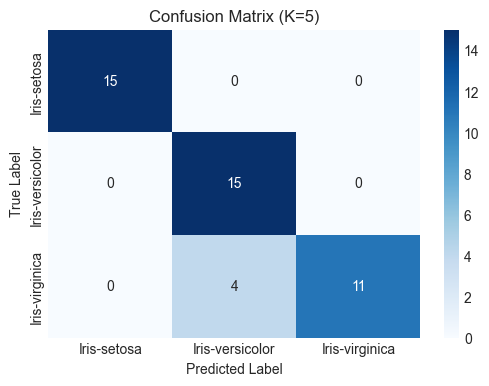

In [36]:
print("\nConfusion Matrix:")
# Use seaborn for a nicer plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_initial, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (K={initial_k})')
plt.show()

In [38]:
print("Classification Report:")
print(report_initial)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.79      1.00      0.88        15
 Iris-virginica       1.00      0.73      0.85        15

       accuracy                           0.91        45
      macro avg       0.93      0.91      0.91        45
   weighted avg       0.93      0.91      0.91        45



In [39]:
k_range = range(1, 26) # Test K values from 1 to 25
accuracy_scores = []

In [40]:
# Loop through different values of K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

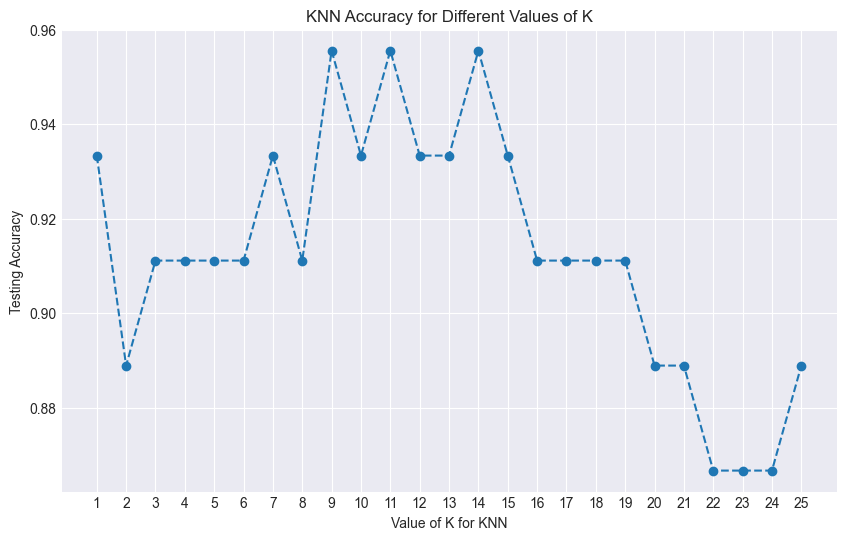

In [41]:
# Plot K vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='dashed')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('KNN Accuracy for Different Values of K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [45]:
best_accuracy = max(accuracy_scores)
best_k_values = [k for k, accuracy in zip(k_range, accuracy_scores) if accuracy == best_accuracy]
print(f"Maximum accuracy ({best_accuracy:.4f}) achieved at K = {best_k_values}")
best_k = best_k_values[0]

Maximum accuracy (0.9556) achieved at K = [9, 11, 14]


Evaluate KNN with Best K

--- Re-evaluating with Best K (K=9) ---

Accuracy with K=9: 0.9556

Confusion Matrix:


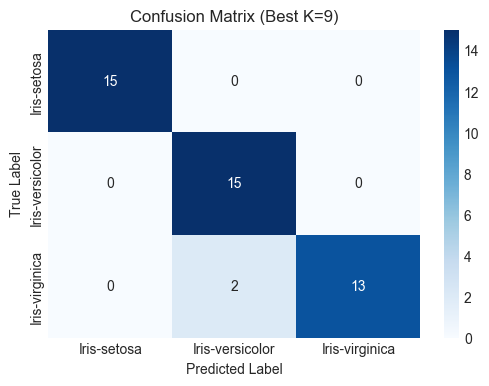


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [49]:
# Retrain and evaluate with the best K found
print(f"--- Re-evaluating with Best K (K={best_k}) ---")
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

# Evaluate the 'best K' model
accuracy_best = accuracy_score(y_test, y_pred_best)
cm_best = confusion_matrix(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best, target_names=label_encoder.classes_)

print(f"\nAccuracy with K={best_k}: {accuracy_best:.4f}")

print("\nConfusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Best K={best_k})')
plt.show()

print("\nClassification Report:")
print(report_best)

Visualize Decision Boundaries

In [50]:
# Select indices for Petal Length and Petal Width (columns 2 and 3)
feature_index_1 = 2 # PetalLengthCm
feature_index_2 = 3 # PetalWidthCm
feature_names_2d = [X.columns[feature_index_1], X.columns[feature_index_2]]

In [51]:
# Use the SCALED data for these two features
X_train_2d_scaled = X_train_scaled[:, [feature_index_1, feature_index_2]]
X_test_2d_scaled = X_test_scaled[:, [feature_index_1, feature_index_2]]

# Train a KNN model on the 2D scaled data using the best K
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d_scaled, y_train) # Use the original y_train

KNeighborsClassifier(n_neighbors=9)

In [55]:
# Define a function to plot boundaries
def plot_decision_boundaries_knn(X_scaled, y, model, feature_names, class_names):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # Light Red, Green, Blue
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # Red, Green, Blue

    # Calculate min, max and range for the chosen features
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

    # Create mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot training points (or test points)
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette=cmap_bold,
                    alpha=1.0, edgecolor="black")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"KNN Decision Boundaries (K={model.n_neighbors}, Features: {feature_names[0]} & {feature_names[1]})")
    plt.xlabel(f"Scaled {feature_names[0]}")
    plt.ylabel(f"Scaled {feature_names[1]}")

    # Create legend handles manually
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=class_names[i],
                          markerfacecolor=cmap_bold.colors[i], markersize=10) for i in range(len(class_names))]
    plt.legend(title="Species", handles=handles, loc='lower right')
    plt.show()


--- Visualizing Decision Boundaries (using 2 features: Petal Length & Width) ---



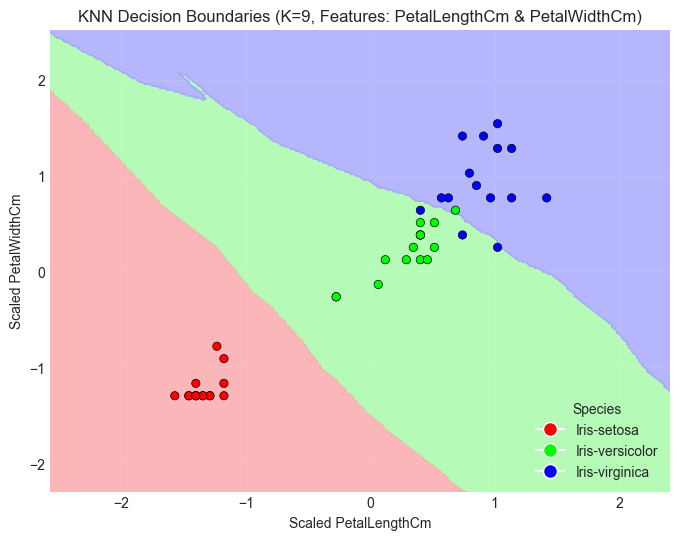

In [56]:
# Plot boundaries using the test set points for visualization
print("\n--- Visualizing Decision Boundaries (using 2 features: Petal Length & Width) ---\n")
plot_decision_boundaries_knn(X_test_2d_scaled, y_test, knn_2d, feature_names_2d, label_encoder.classes_)

In [57]:
print("Note: This visualization uses only 2 features for plotting purposes.")
print("The actual model uses all features.")

Note: This visualization uses only 2 features for plotting purposes.
The actual model uses all features.
